In [18]:
import pydicom as dicom
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import radon, iradon, rescale

#### Sinogram

In [2]:
dcm_img = '/mnt/ssd/python_projects/streamlit_app/pages/images/sino_proj/JasPhan.dcm'

In [3]:
ds = dicom.dcmread(dcm_img)
img = ds.pixel_array.astype(np.float32)
print(img.shape)
sino = img[:,75,:].copy()
sino = np.swapaxes(sino,0,1)
print(sino.shape)

(120, 128, 128)
(128, 120)


float32


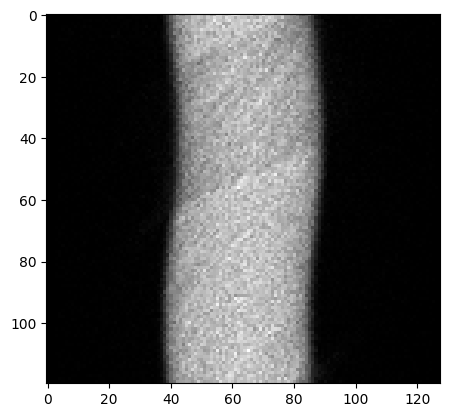

In [7]:
plt.imshow(sino.T, cmap= 'gray')
print(sino.dtype)
# print(sino.max())

In [12]:
np.save('/mnt/ssd/python_projects/streamlit_app/pages/images/recon/JasPhan_02.npy', sino)

uint8


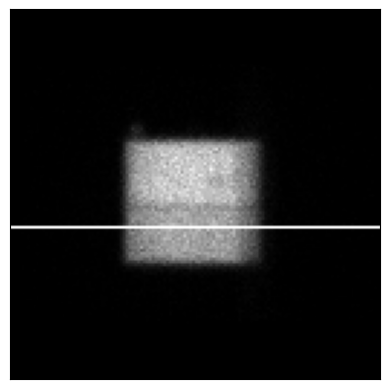

In [4]:
scaled_image = (np.maximum(img, 0) / img.max()) * 255.0
disp_img = np.uint8(scaled_image)
proj_img = disp_img[0,:,:].copy()
proj_img[75,:] = 255.0
plt.imshow(proj_img, cmap= 'gray')
plt.xticks([]), plt.yticks([])
print(proj_img.dtype)

In [17]:
np.save('/mnt/ssd/python_projects/streamlit_app/pages/images/JasPhan_prj_01.npy', proj_img)

#### filter

(256, 256)
(256, 256)
float32
19402.0
uint8
255


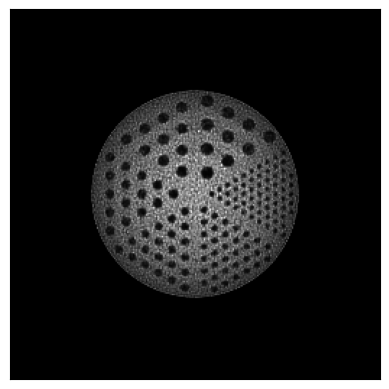

In [35]:
dcm_img = '/mnt/ssd/python_projects/streamlit_app/pages/images/jasphan_osem.dcm'
ds = dicom.dcmread(dcm_img)
img = ds.pixel_array.astype(np.float32)
print(img.shape)
# sino = img[:, 75, :].copy()
# sino = np.swapaxes(sino, 0, 1)
print(img.shape)
plt.imshow(img, cmap= 'gray')
plt.xticks([]), plt.yticks([])
print(img.dtype)
print(img.max())
scaled_image = (np.maximum(img, 0) / img.max()) * 255.0
img = np.uint8(scaled_image)
print(img.dtype)
print(img.max())

In [36]:
from PIL import Image
im = Image.fromarray(img)
im = im.convert("L")
im.save("jasphan_osem.jpeg")

float32
1.0
uint8
255


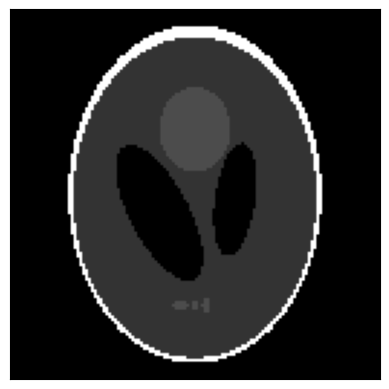

In [32]:
import nibabel as nib

nii_img = (
    "/mnt/ssd/python_projects/streamlit_app/pages/images/sino_proj/Shepp_Logan_3D.nii"
)

nii_obj = nib.nifti1.load(nii_img)
img = nii_obj.get_fdata()
img = np.squeeze(img).astype(np.float32)
img = np.flipud(img)
plt.imshow(img[:,:,64], cmap= 'gray')
plt.xticks([]), plt.yticks([])
print(img.dtype)
print(img.max())
scaled_image = (np.maximum(img, 0) / img.max()) * 255.0
img = np.uint8(scaled_image)
print(img.dtype)
print(img.max())

In [33]:
np.save(
    "/mnt/ssd/python_projects/streamlit_app/pages/images/sino_proj/Shepp_Logan.npy", img[:,:,64]
)

In [19]:
def get_projection(object, theta, m, n):
    sino_p = np.zeros([m, theta.shape[0], n])
    for i in range(n):
        sino_p[:, :, i] = radon(object[:, :, i], theta, preserve_range=True)

    prj = np.swapaxes(sino_p, 0, 1)
    prj = np.swapaxes(prj, 1, 2)

    return prj

In [34]:
thetas = np.array(range(0, 180, 3))
a = np.flip(nii_obj.get_fdata(), axis=0)
prj = get_projection(a, thetas, 128,128)

(([], []), ([], []))

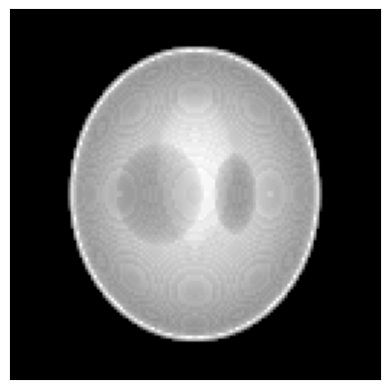

In [35]:
plt.imshow(prj[0, :, :], cmap="gray")
plt.xticks([]), plt.yticks([])

In [36]:
scaled_image = (np.maximum(prj, 0) / prj.max()) * 255.0
np.save(
    "/mnt/ssd/python_projects/streamlit_app/pages/images/sino_proj/Shepp_Logan_Prj.npy",
    scaled_image
)

float64


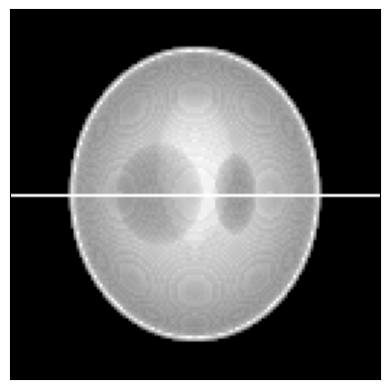

In [31]:
scaled_image = (np.maximum(prj, 0) / prj.max()) * 255.0
proj_img = scaled_image[0, :, :].copy()
proj_img[64, :] = 255.0
plt.imshow(proj_img, cmap="gray")
plt.xticks([]), plt.yticks([])
print(proj_img.dtype)

In [31]:
from PIL import Image
im = Image.fromarray(img)
im = im.convert("L")
im.save("MUGA.jpeg")